In [1]:
from dna_segmentation_benchmark import evaluate_predictors as ep
from enum import Enum
import numpy as np

## Config
You have to create your own enum class that maps the integers to your labels. This works with every label you can think of as long as it has an integer mapping.
**YOU MUST DEFINE NONCODING**. \
Furthermore, it is advised for now to also define **EXON** as some evaluation metrics depend on it. \
To select the kind of evaluations you want simply add the corresponding class

In [2]:
class CustomLabelDef(Enum):
    NONCODING = 1
    EXON = 2
    INTRON = 3


chosen_eval_metrics = [ep.EvalMetrics.INDEL, ep.EvalMetrics.SECTION, ep.EvalMetrics.ML, ep.EvalMetrics.FRAMESHIFT]
classes_to_eval = [CustomLabelDef.EXON, CustomLabelDef.INTRON]

## Data
For example data I provide the segmentation results we ran on the gene finding dataset from the BEND paper
```
Marin, Frederikke Isa, et al. “BEND: Benchmarking DNA Language Models on Biologically Meaningful Tasks.” ArXiv.org, 2023, arxiv.org/abs/2311.12570.
```
I changed the labels and treated each strand as a seperate sequence for simplicity


In [3]:
def unpack_npz_to_list(npz_file_object):
    data_list = []
    for key in npz_file_object.keys():
        data_list.append(npz_file_object[key])
    return data_list

gt_labels = unpack_npz_to_list(np.load("../example_data/ground_truth_annotations.npz", allow_pickle=True))
segment_nt_labels =unpack_npz_to_list(np.load("../example_data/segmentnt_annotations.npz", allow_pickle=True))
augustus_labels = unpack_npz_to_list(np.load("../example_data/augustus_annotations.npz", allow_pickle=True))
tiberius_labels = unpack_npz_to_list(np.load("../example_data/tiberius_annotations.npz", allow_pickle=True))

assert all(len(elem[0]) == len(elem[j]) for elem in zip(*[gt_labels,segment_nt_labels,augustus_labels,tiberius_labels]) for j in range(1, len(elem)))

In [4]:
augustus_evaluation = ep.benchmark_gt_vs_pred_multiple(gt_labels=gt_labels,
                                              pred_labels=augustus_labels,
                                              labels=CustomLabelDef,
                                              classes=classes_to_eval,
                                              metrics=chosen_eval_metrics)

segment_nt_evaluation = ep.benchmark_gt_vs_pred_multiple(gt_labels=gt_labels,
                                              pred_labels=segment_nt_labels,
                                              labels=CustomLabelDef,
                                              classes=classes_to_eval,
                                              metrics=chosen_eval_metrics)

tiberius_evaluation = ep.benchmark_gt_vs_pred_multiple(gt_labels=gt_labels,
                                              pred_labels=tiberius_labels,
                                              labels=CustomLabelDef,
                                              classes=classes_to_eval,
                                              metrics=chosen_eval_metrics)

eval_summary = {"augustus": augustus_evaluation,
                "segmentnt": segment_nt_evaluation,
                "tiberius": tiberius_evaluation}

/home/benjaminkroeger/Documents/Master/MasterThesis/Thesis_Code/Benchmark/src/dna_segmentation_benchmark/evaluate_predictors.py:144: UserWarning: The Frameshift metric should only be used if you are sure that the transcript contains all  of the annotated exons. Otherwise this metric will produce wrong and misleading results
  warnings.warn("The Frameshift metric should only be used if you are sure that the transcript contains all "
Running benchmark: 100%|██████████| 1194/1194 [00:01<00:00, 904.79it/s]
/home/benjaminkroeger/Documents/Master/MasterThesis/Thesis_Code/Benchmark/src/dna_segmentation_benchmark/evaluate_predictors.py:144: UserWarning: The Frameshift metric should only be used if you are sure that the transcript contains all  of the annotated exons. Otherwise this metric will produce wrong and misleading results
  warnings.warn("The Frameshift metric should only be used if you are sure that the transcript contains all "
Running benchmark: 100%|██████████| 1194/1194 [00:01<00:

## Visualization


--- Generating plots for class: EXON ---


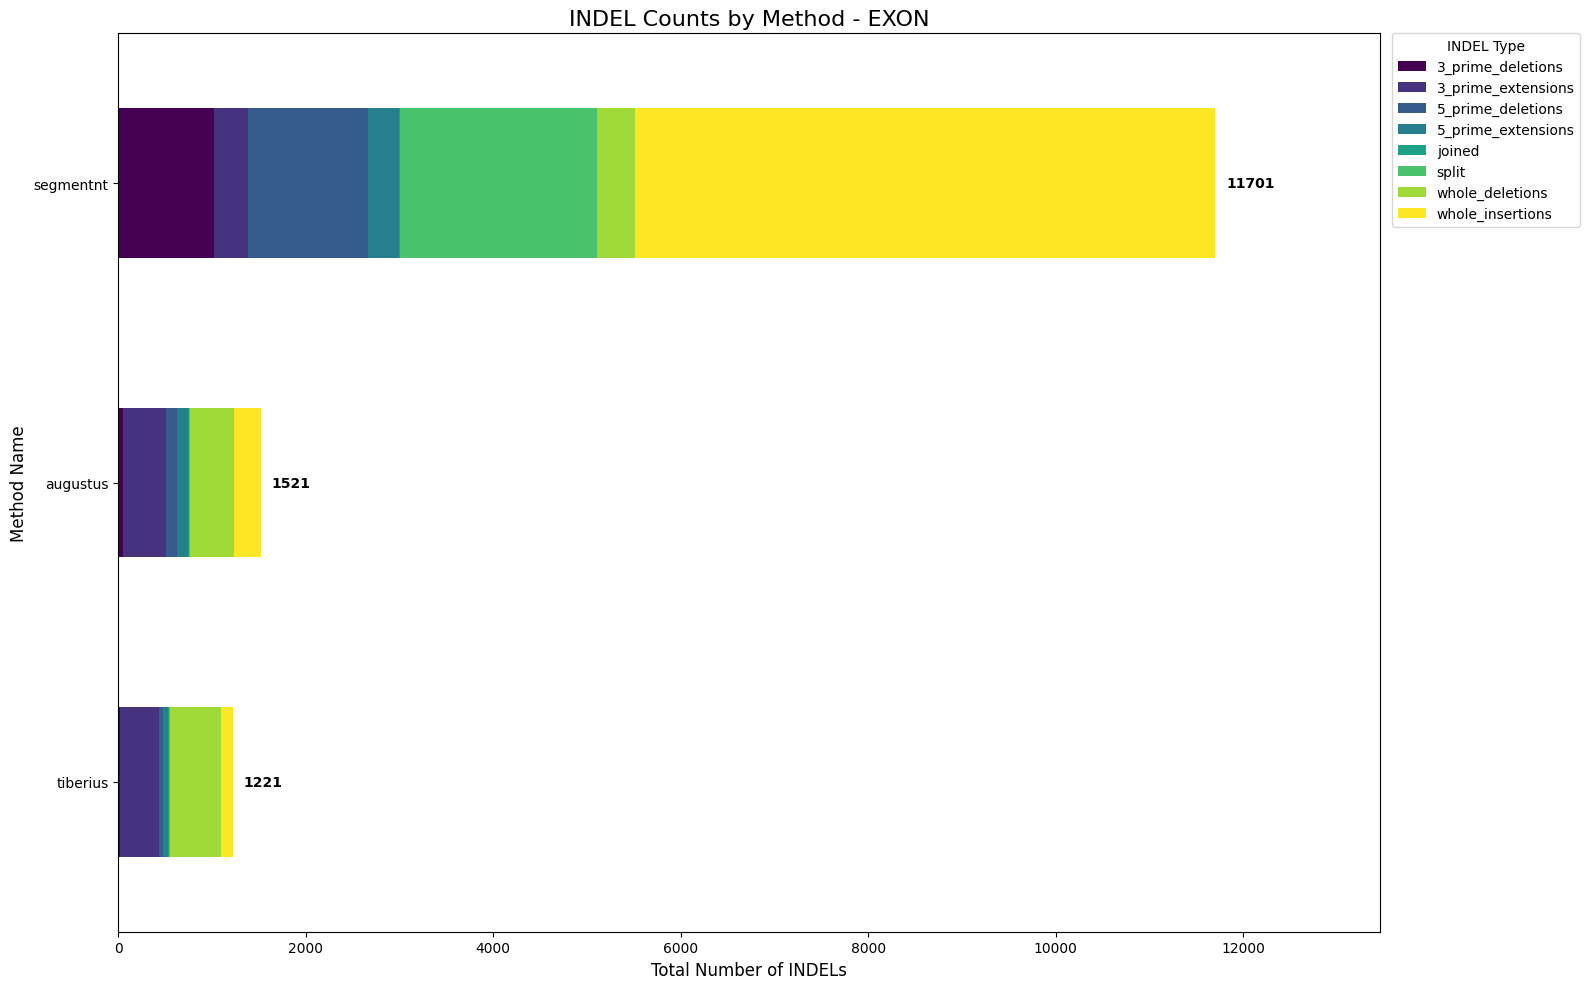

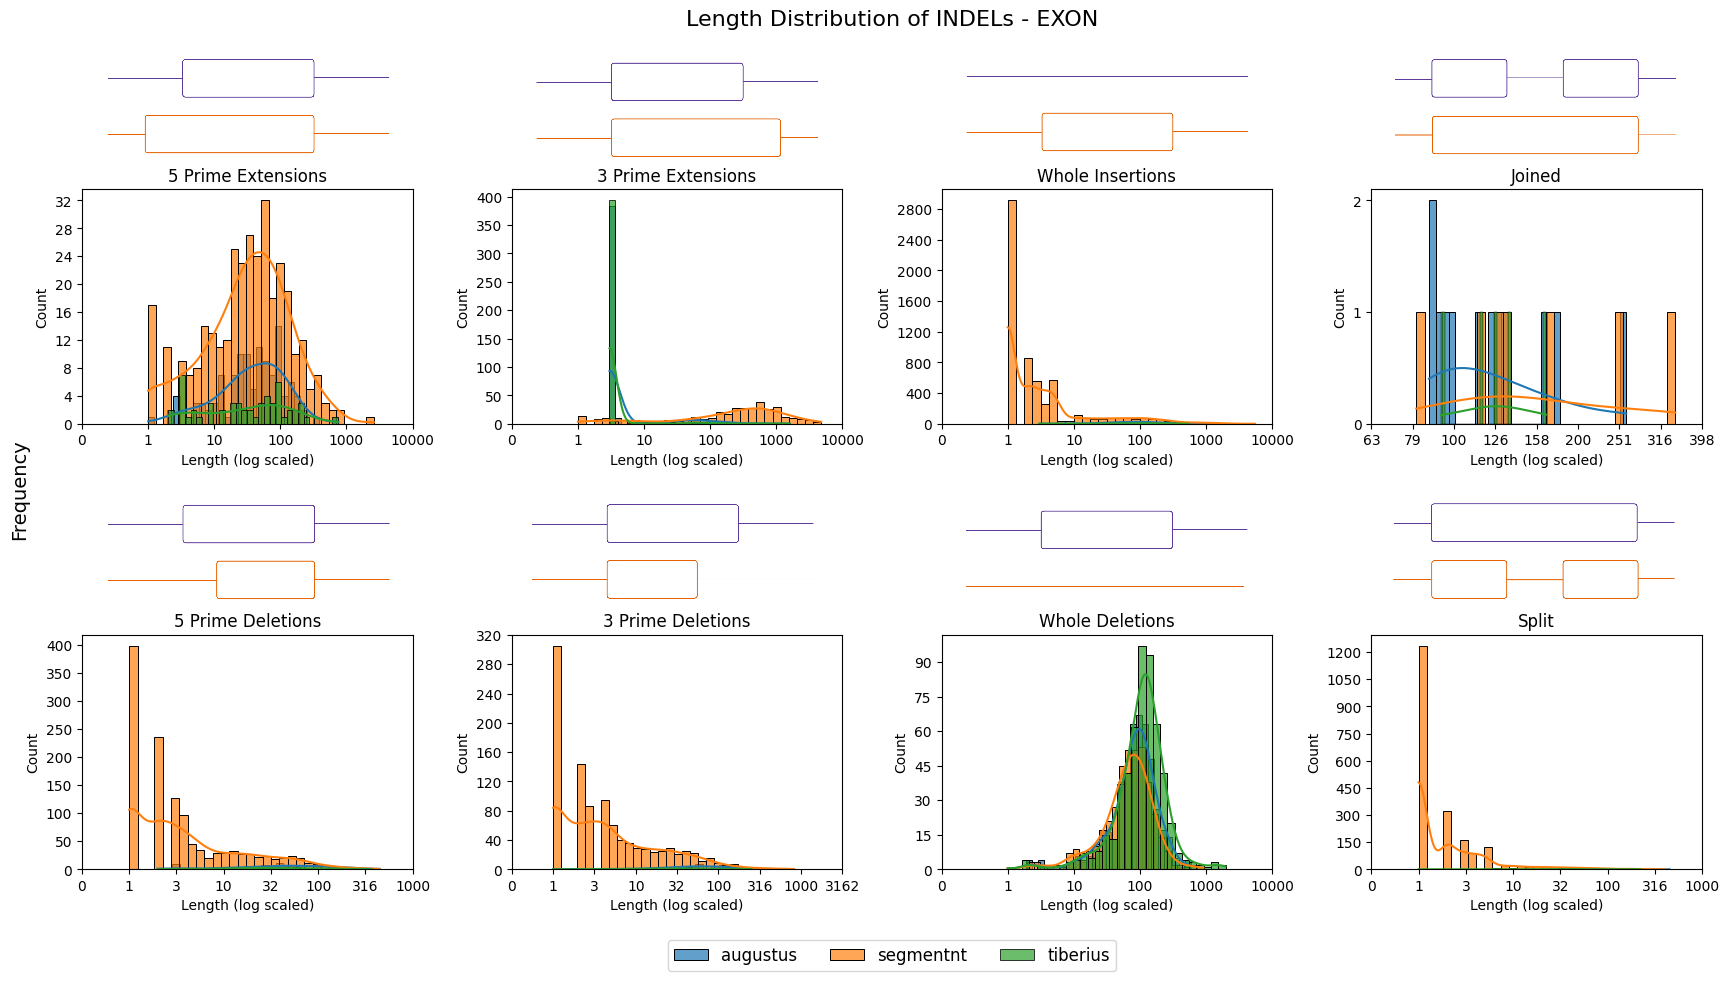

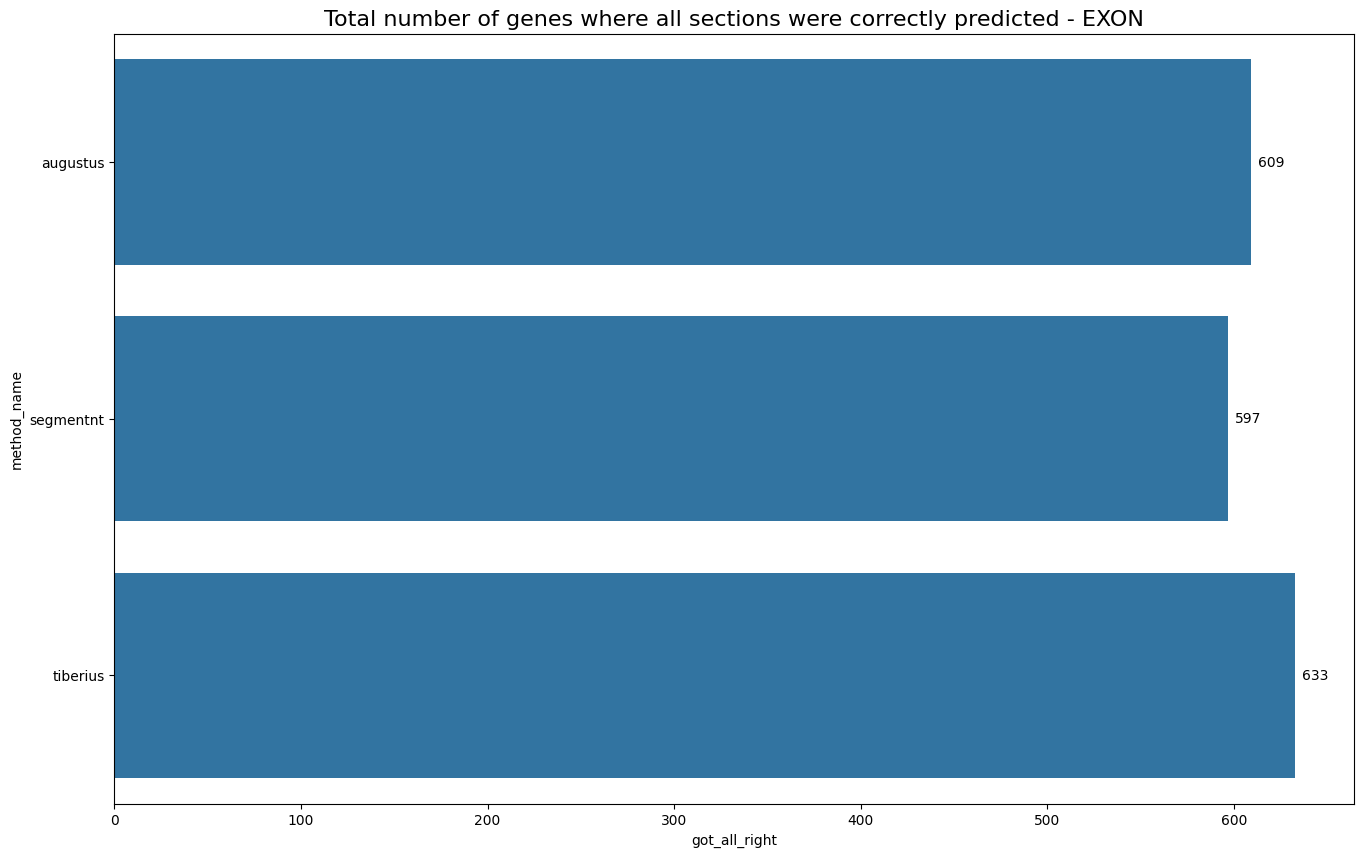

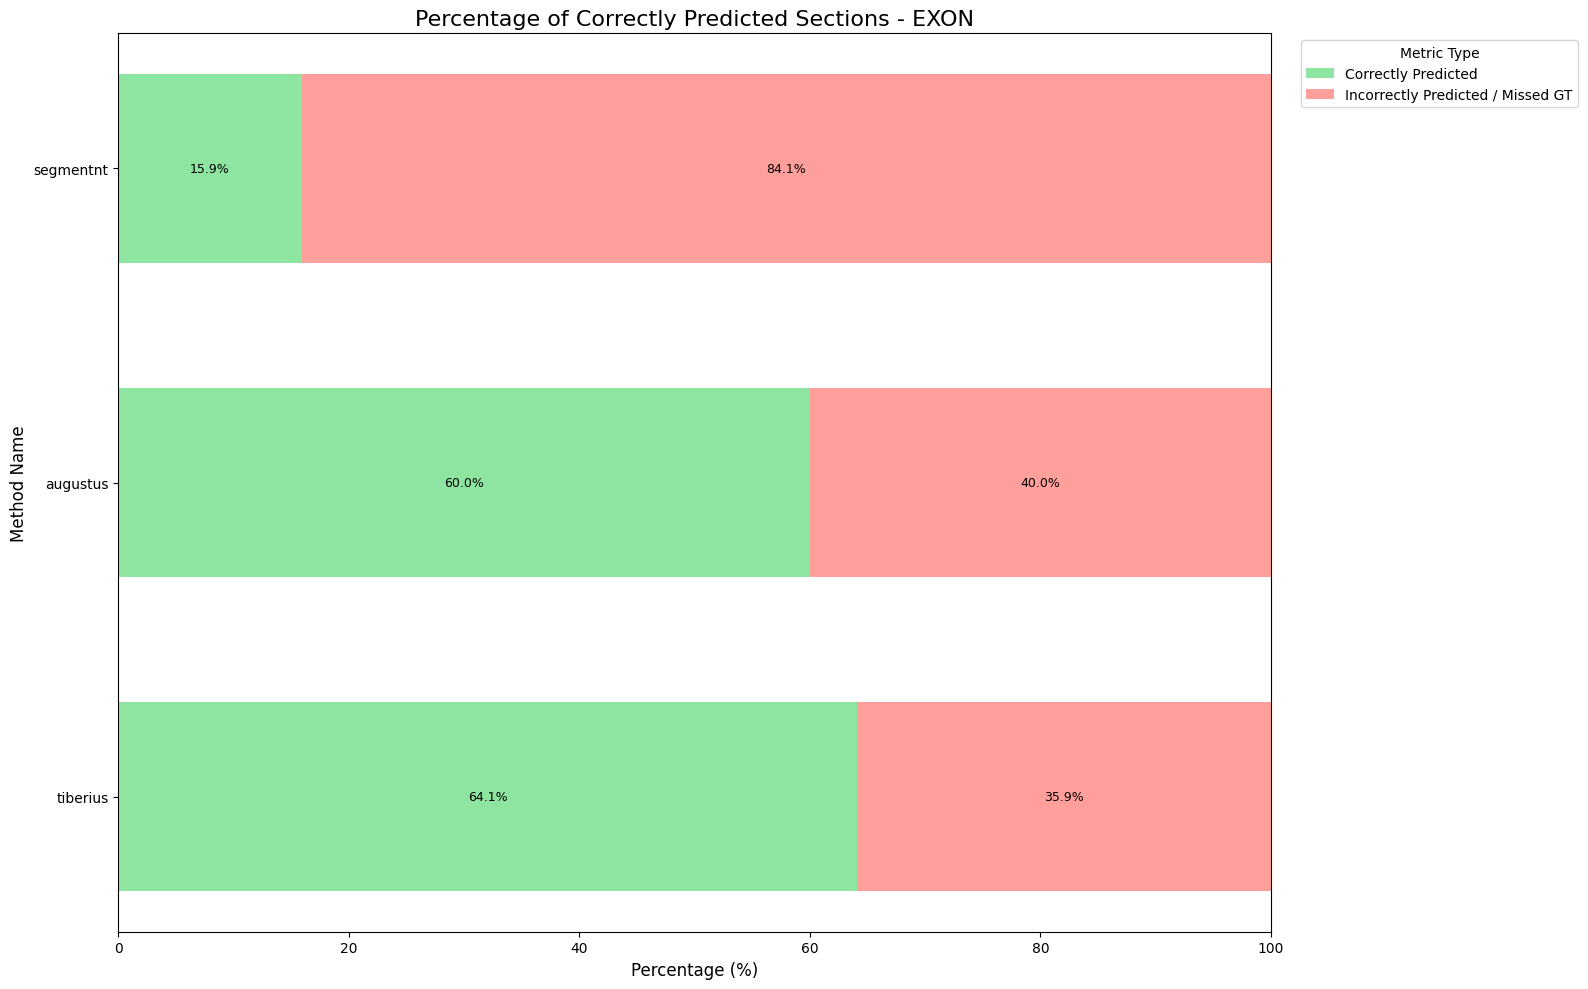

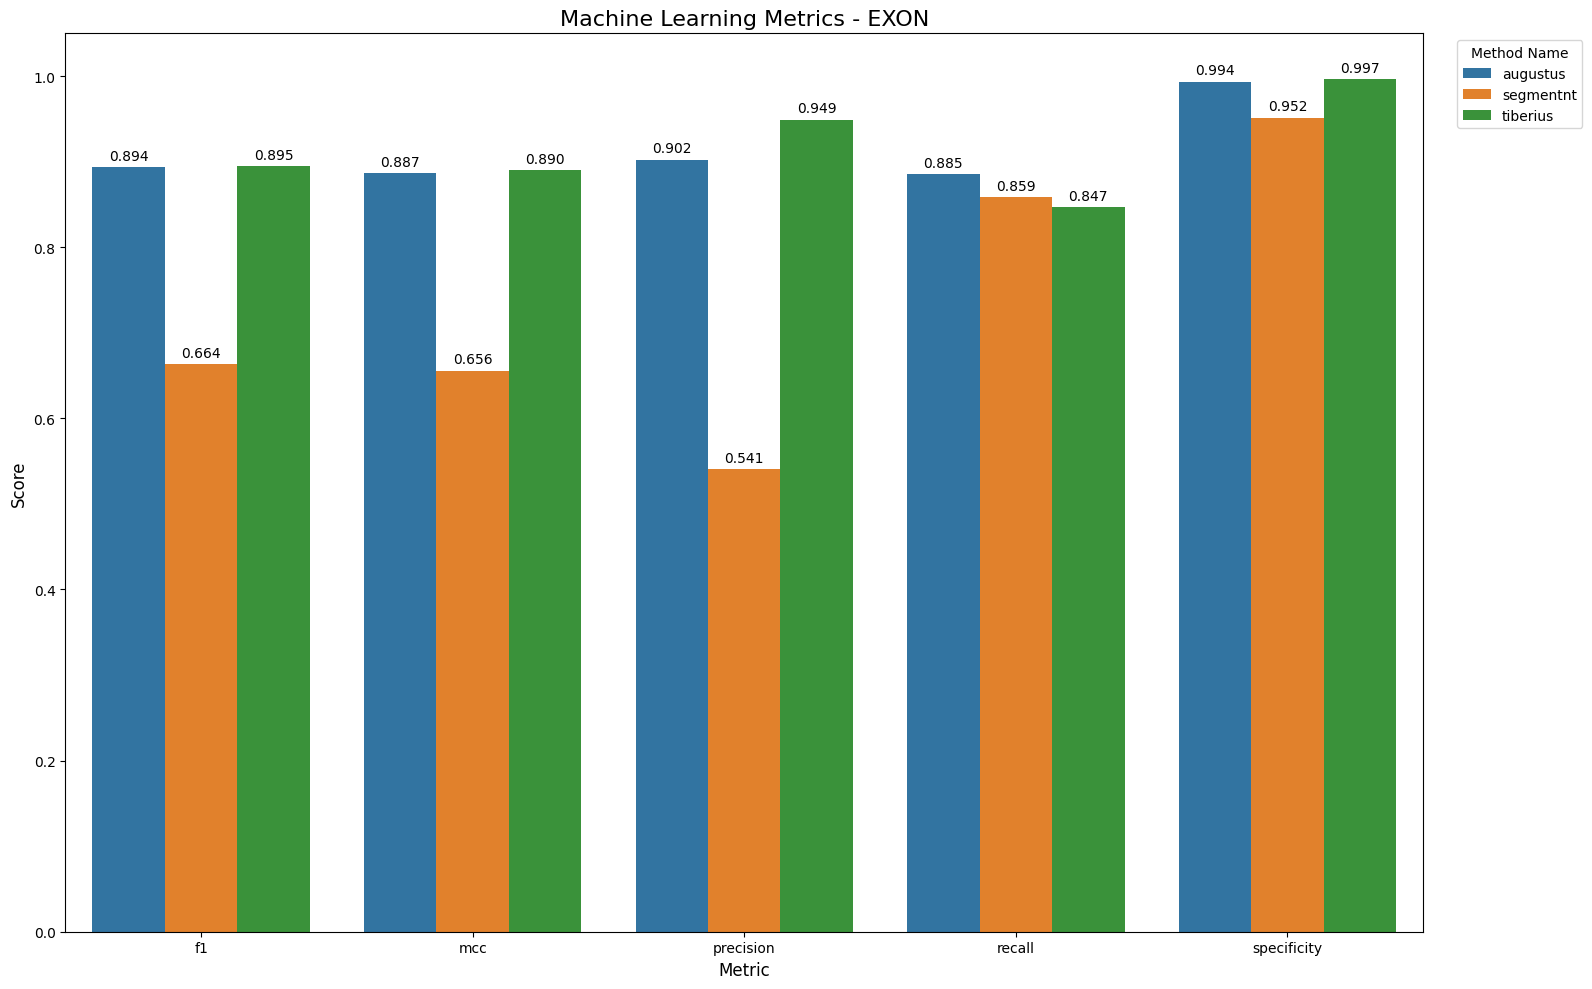

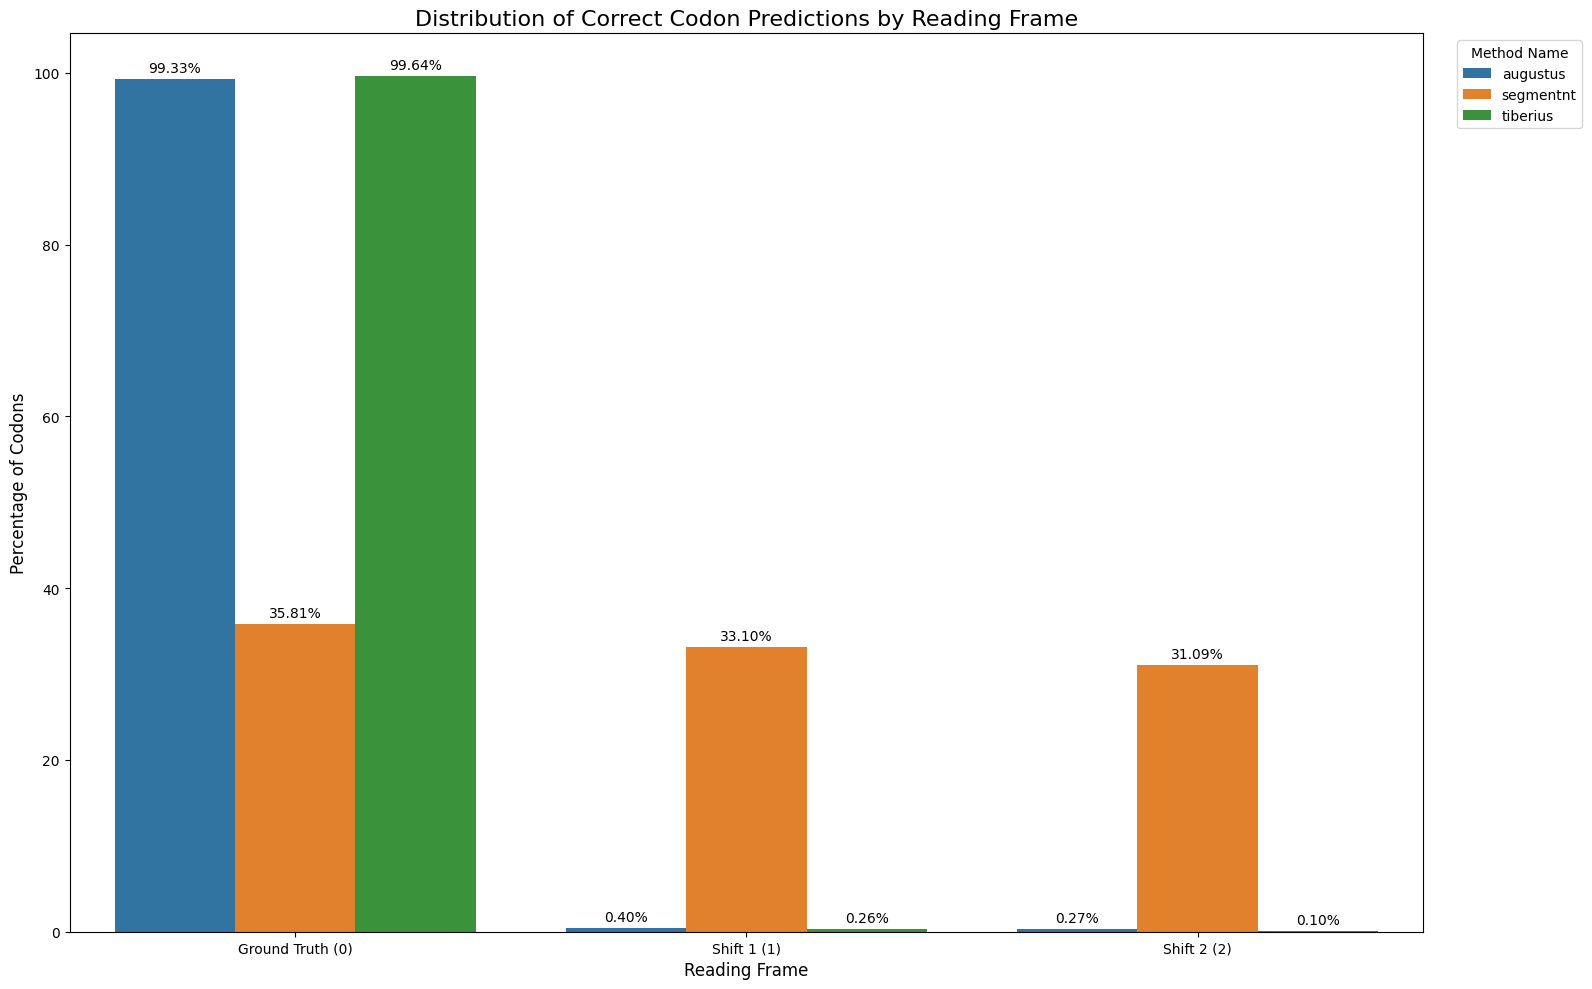


--- Generating plots for class: INTRON ---


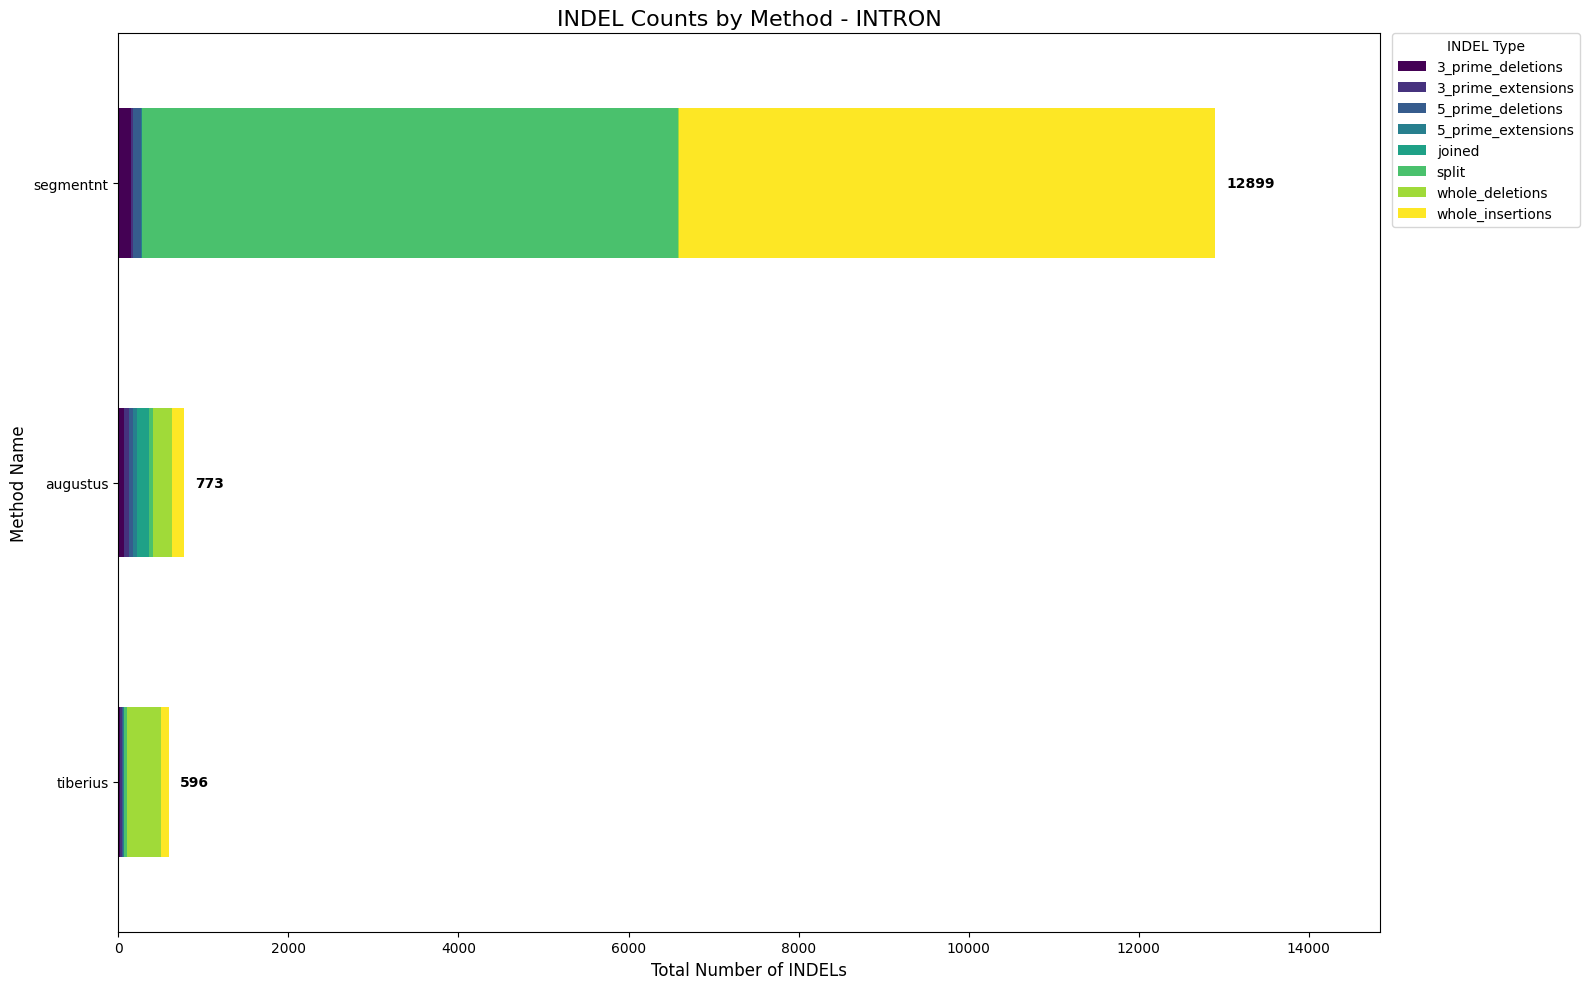

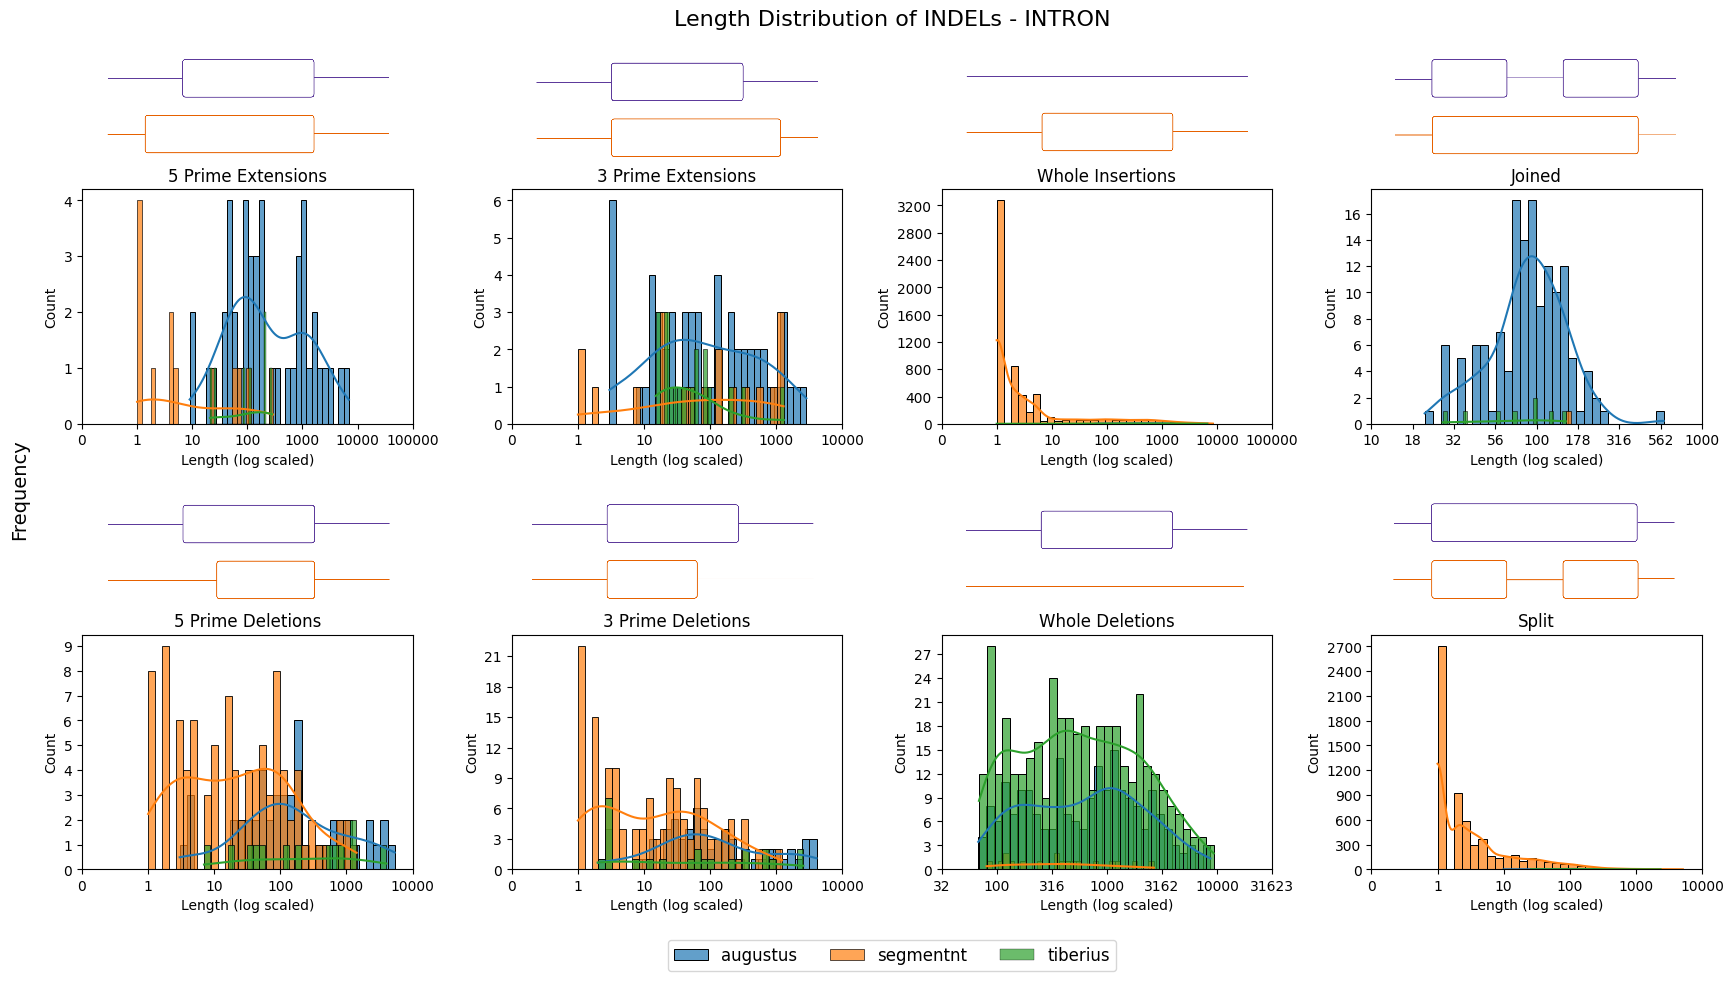

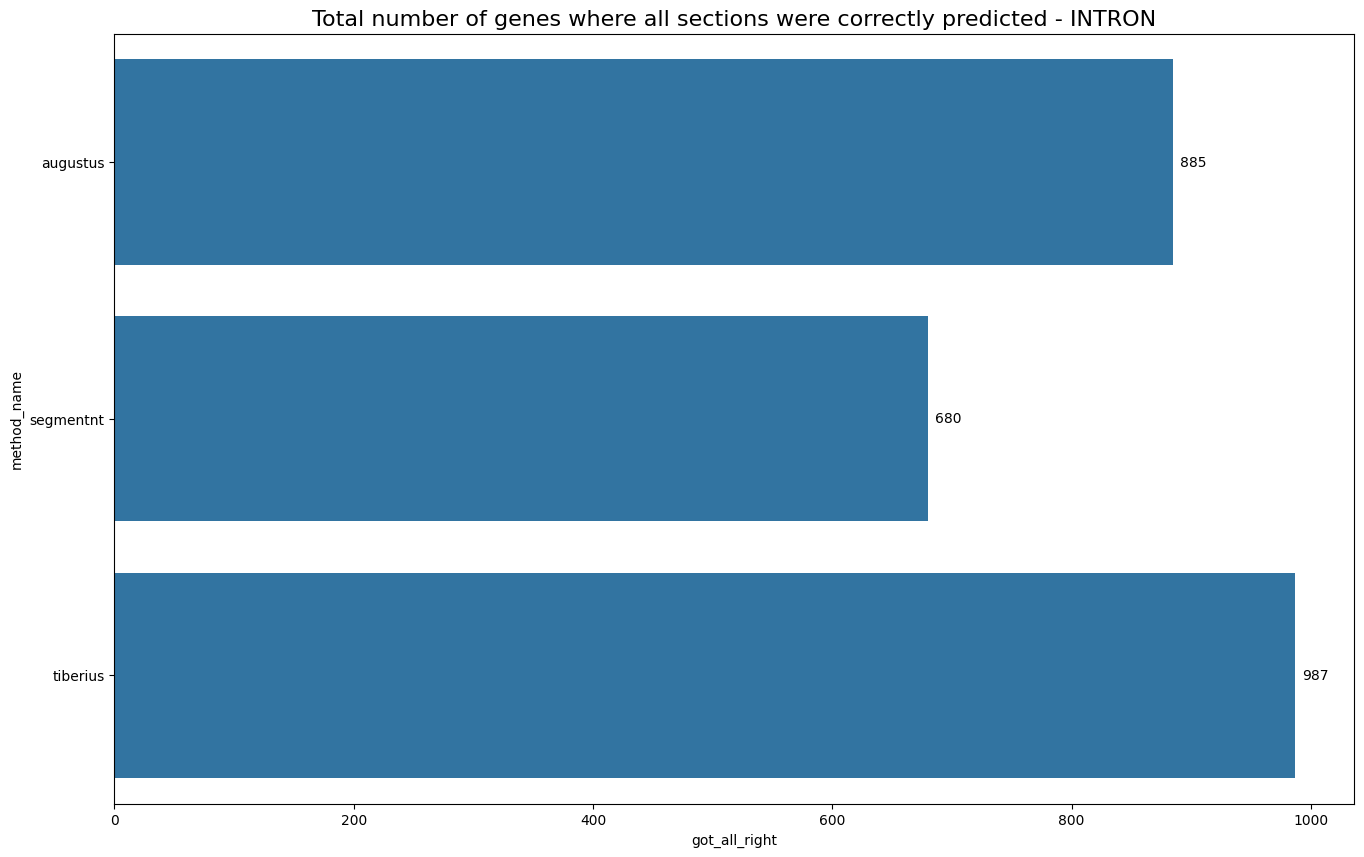

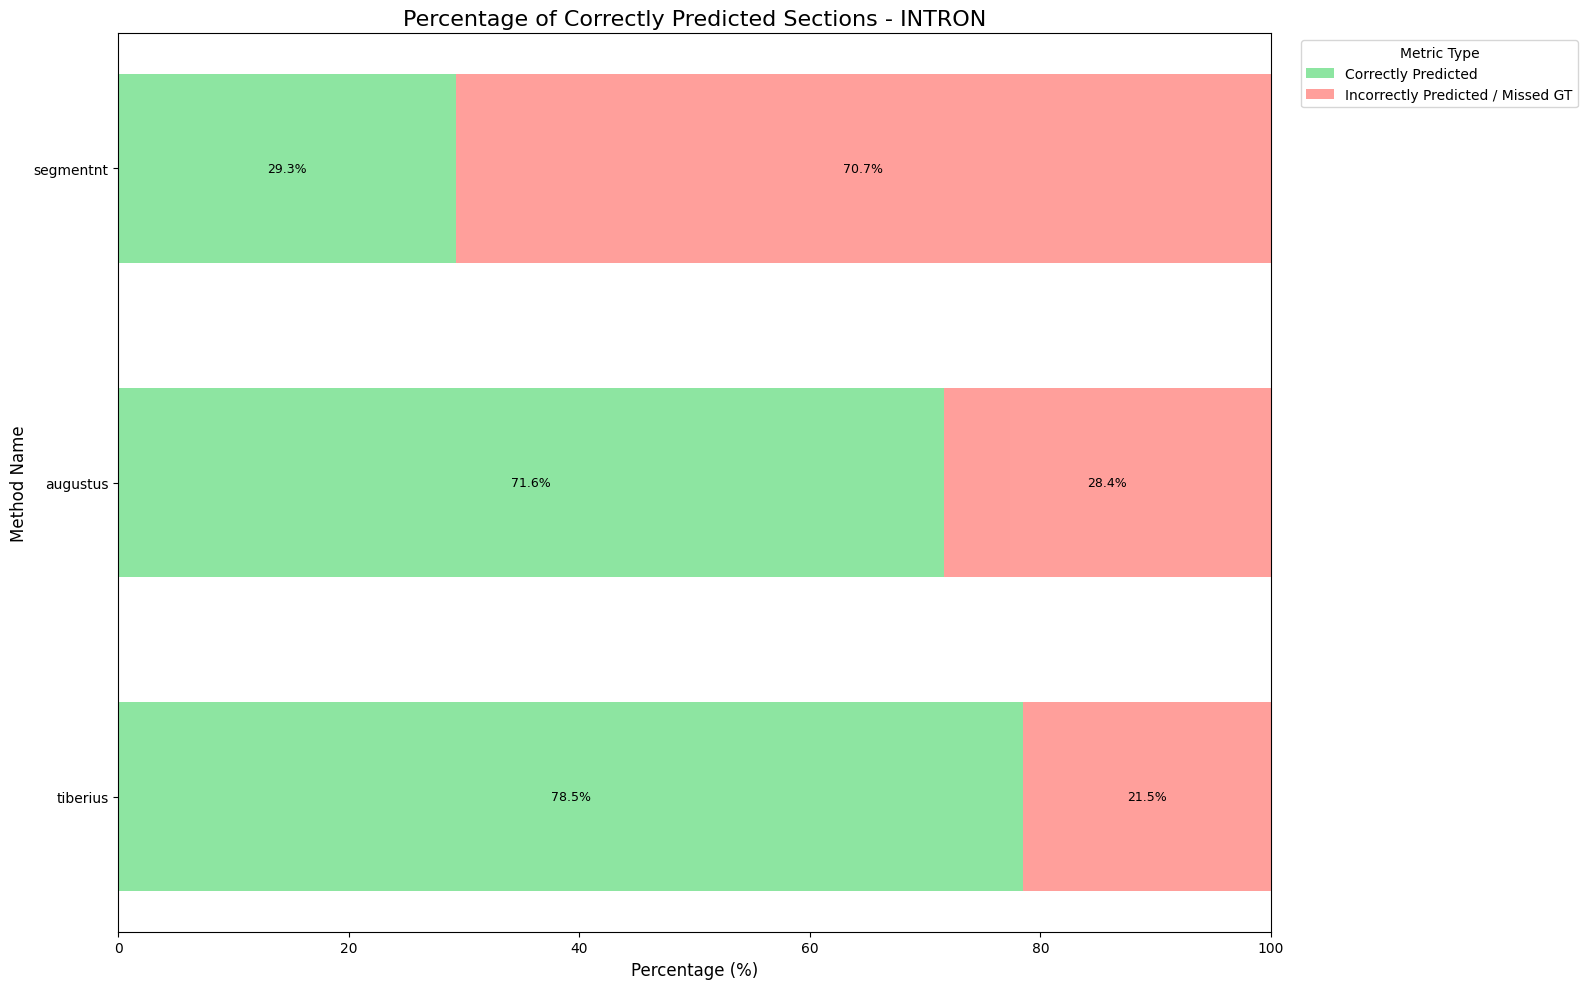

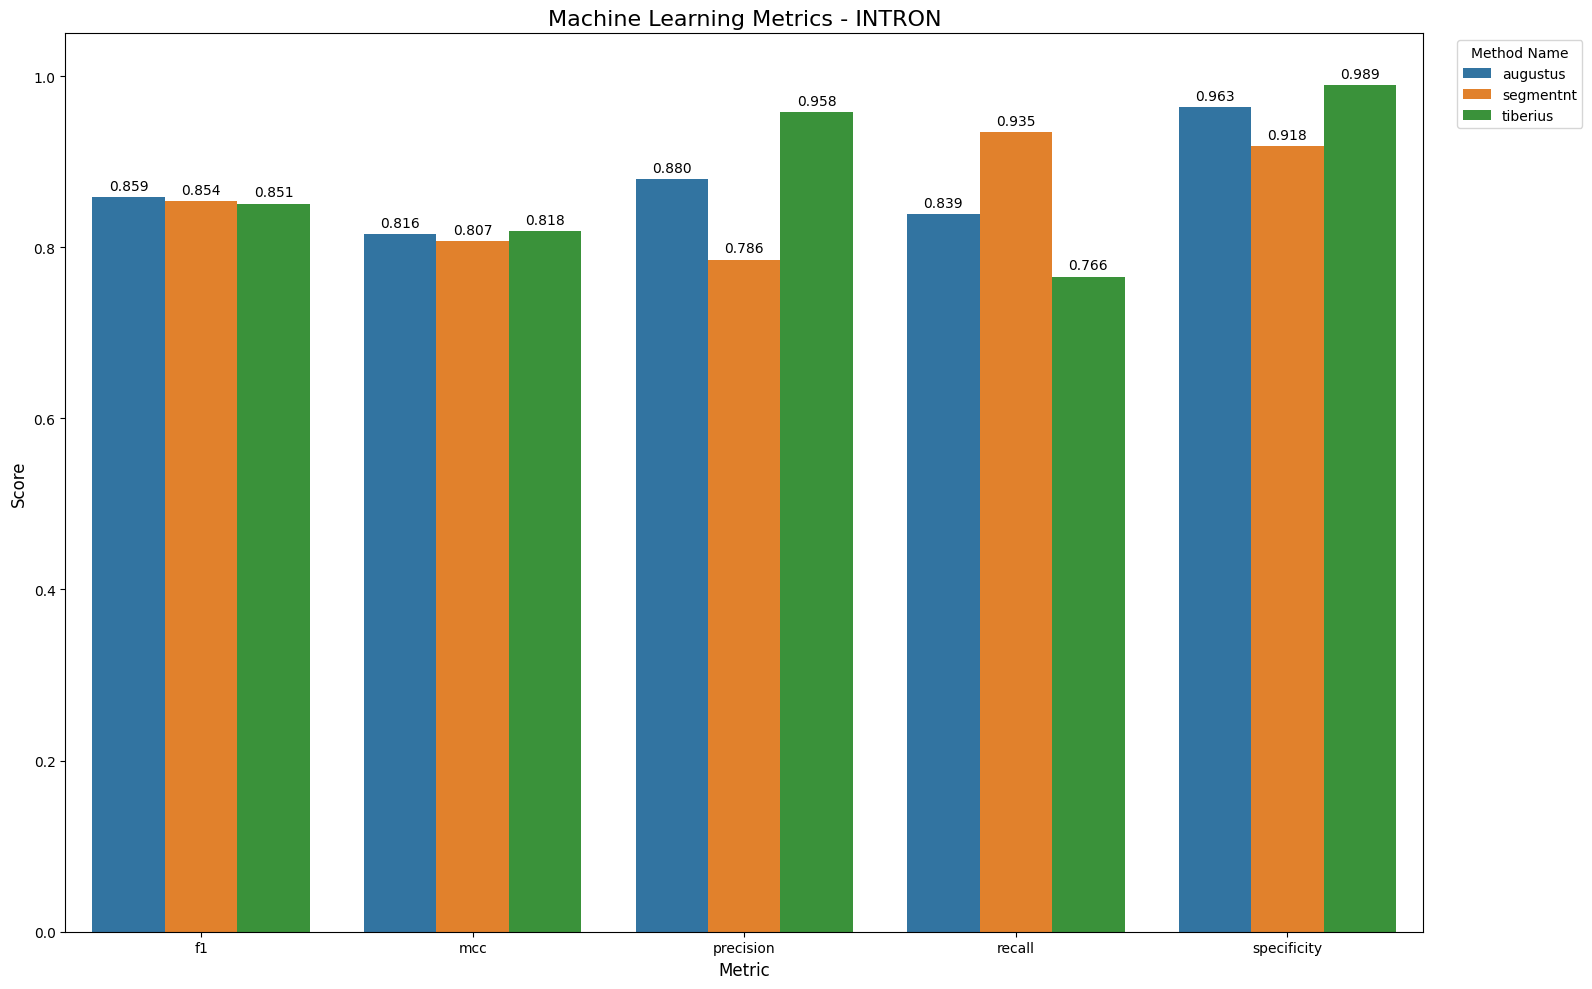

No FRAMESHIFT data for class INTRON.


In [5]:
from dna_segmentation_benchmark.summary_stat_plotting import compare_multiple_predictions

compare_multiple_predictions(per_method_benchmark_res=eval_summary,
                             classes_to_eval=classes_to_eval,
                             metrics_to_eval=chosen_eval_metrics) # this is still buggy, best redefine it and not reuse it